In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import warnings; warnings.filterwarnings('ignore')

In [2]:
X_train, y_train = load_svmlight_file('train.txt')
X_test, y_test = load_svmlight_file('test.txt')

In [3]:
svd = TruncatedSVD(n_components=10)
svd.fit(X_train)
X_train = svd.transform(X_train)
X_test = svd.transform(X_test)

In [4]:
size = X_train.shape
batchsize = 1000
end = batchsize
knn_history = []
logit_history = []
lda_history = []
nb_history = []

In [5]:
while end <= size[0]:
    
    print('Training with {} samples'.format(end))
    
    knn = KNeighborsClassifier()
    logit = LogisticRegression()
    lda = LinearDiscriminantAnalysis()
    nb = GaussianNB()
    
    knn.fit(X_train[0:end], y_train[0:end])
    logit.fit(X_train[0:end], y_train[0:end])
    lda.fit(X_train[0:end], y_train[0:end])
    nb.fit(X_train[0:end], y_train[0:end])
    
    knn_history.append(knn.score(X_test, y_test))
    logit_history.append(logit.score(X_test, y_test))
    lda_history.append(lda.score(X_test, y_test))
    nb_history.append(nb.score(X_test, y_test))
    
    end = end + batchsize

Training with 1000 samples
Training with 2000 samples
Training with 3000 samples
Training with 4000 samples
Training with 5000 samples
Training with 6000 samples
Training with 7000 samples
Training with 8000 samples
Training with 9000 samples
Training with 10000 samples
Training with 11000 samples
Training with 12000 samples
Training with 13000 samples
Training with 14000 samples
Training with 15000 samples
Training with 16000 samples
Training with 17000 samples
Training with 18000 samples
Training with 19000 samples
Training with 20000 samples


# Compare o desempenho desses classificadores em função da disponibilidade de base de treinamento

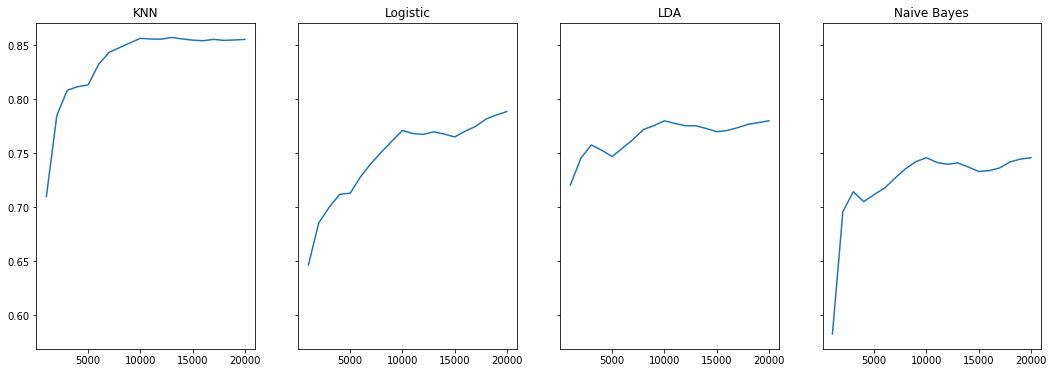

In [6]:
x = [i for i in range(1000, 20001, 1000)]
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(18,6))
ax1.plot(x, knn_history)
ax1.set_title('KNN')
ax2.plot(x, logit_history)
ax2.set_title('Logistic')
ax3.plot(x, lda_history)
ax3.set_title('LDA')
ax4.plot(x, nb_history)
ax4.set_title('Naive Bayes');

* O KNN é o classificador que apresenta o melhor resultado dentre os 4 classificadores

* KNN e Naive Bayes a partir de 10k exemplos deixam de aumentar a acurácia da base de teste. A regressão logística e o LDA continuam aumentando a acurácia na base de teste a medida que aumenta a base de treino, especialmente a regressão logística

# Qual é o classificador que tem o melhor desempenho com poucos dados < 1000 exemplos

In [7]:
print('''
KNN: {}
Logit: {}
LDA: {}
Naive: {}'''.format(knn_history[0],
                    logit_history[0],
                    lda_history[0],
                    nb_history[0]))


KNN: 0.7099034887289841
Logit: 0.6465743614227739
LDA: 0.7205436005865703
Naive: 0.5827166388159465


* O melhor classificador com poucos dados (1000 exemplos de treino) é o LDA

# Qual é o classificador que tem melhor desempenho com todos os dados

In [8]:
print('''
KNN: {}
Logit: {}
LDA: {}
Naive: {}'''.format(knn_history[-1],
                    logit_history[-1],
                    lda_history[-1],
                    nb_history[-1]))


KNN: 0.8551989905534905
Logit: 0.7884766224465437
LDA: 0.7798997374074959
Naive: 0.7457456604030965


* O KNN é o classificador que tem o melhor desempenho com todos os dados

# Qual é o classificador é mais rápido para classificar os 58k exemplos de teste

In [9]:
%%time
knn.score(X_test, y_test)

CPU times: user 4.08 s, sys: 19.9 ms, total: 4.1 s
Wall time: 3.89 s


0.8551989905534905

In [10]:
%%time
logit.score(X_test, y_test)

CPU times: user 21 ms, sys: 11.9 ms, total: 32.9 ms
Wall time: 15.9 ms


0.7884766224465437

In [11]:
%%time
lda.score(X_test, y_test)

CPU times: user 30.9 ms, sys: 68 µs, total: 30.9 ms
Wall time: 14.8 ms


0.7798997374074959

In [12]:
%%time
nb.score(X_test, y_test)

CPU times: user 201 ms, sys: 8 µs, total: 201 ms
Wall time: 99.6 ms


0.7457456604030965

* O Naive Bayes é o classificador mais rápido para previsão

# O que vc pode dizer a respeito das matrizes de confusão

In [13]:
print('KNN')
confusion_matrix(y_test, knn.predict(X_test))

KNN


array([[5128,    2,   43,    4,    4,    3,   31,    0,  344,    1],
       [   5, 5810,  202,  103,   57,   11,  139,   64,  131,  133],
       [  58,   27, 5074,  506,   12,   22,   90,   32,   61,    6],
       [   6,    3,  169, 5177,   13,  300,    5,   58,   45,   43],
       [  32,    4,   62,   25, 5092,   15,   97,   71,   79,  245],
       [  16,    5,  135, 1109,   28, 3900,   41,   29,  252,   24],
       [  68,   18,   43,    3,   12,   73, 5435,    0,  206,    0],
       [   1,   25,   34,  206,  118,    3,    1, 5172,   27,  510],
       [ 199,   38,  113,  287,   53,  113,   74,   65, 4562,  191],
       [  18,   17,   18,  199,  302,    4,    2,  311,  138, 4804]])

In [14]:
print('Logit')
confusion_matrix(y_test, logit.predict(X_test))

Logit


array([[4934,    9,  100,   16,    1,   10,  134,    0,  353,    3],
       [   0, 4945,  193,  118,  225,   26,  594,  101,  401,   52],
       [  44,   42, 4951,  447,   17,   55,  197,   59,   67,    9],
       [  10,   11,  239, 5151,   59,  199,   12,  106,   12,   20],
       [  28,    8,    7,   14, 5242,    3,  182,   46,   32,  160],
       [  15,   14,   74, 1527,  237, 3441,   91,   46,   81,   13],
       [  59,   33,   12,   26,   32,  319, 5287,    0,   90,    0],
       [   0,   43,   22,  238,  190,   16,    0, 4984,   35,  569],
       [1036,  145,   96,  286,  189,  331,  114,  137, 3026,  335],
       [  88,   33,    6,  248,  659,    6,    6,  429,   58, 4280]])

In [15]:
print('LDA')
confusion_matrix(y_test, lda.predict(X_test))

LDA


array([[4836,    7,   52,    6,    0,    4,  102,    0,  551,    2],
       [   0, 4978,  171,   71,   51,   15,  958,  147,  109,  155],
       [   9,   43, 4458,  851,   11,   17,  322,   64,   96,   17],
       [   2,   10,  271, 4944,   64,  121,   18,  260,   28,  101],
       [   2,   20,    4,    2, 5066,    0,  207,   14,   73,  334],
       [   5,   12,  121, 1757,  236, 3107,  116,   40,   90,   55],
       [  49,   29,    5,    2,   14,  228, 5163,    0,  368,    0],
       [   0,   40,    7,  113,  156,    4,    0, 4844,   19,  914],
       [ 539,   96,   42,  145,   92,  188,  144,  112, 3862,  475],
       [  79,   30,    4,  149,  509,    2,    9,  392,  159, 4480]])

In [17]:
print('Naive Bayes')
confusion_matrix(y_test, nb.predict(X_test))

Naive Bayes


array([[4861,    8,  239,   77,    1,    5,  123,    0,  244,    2],
       [   0, 4170,  356,   48,   53,   31, 1619,   33,  153,  192],
       [  32,   32, 4779,  861,    6,   11,  120,   16,   23,    8],
       [  10,    9,  601, 4852,   48,   99,   36,   90,   16,   58],
       [  15,   10,   17,    2, 5105,    5,  229,   23,   20,  296],
       [  11,    9,  297, 1914,  198, 2697,  245,   62,   63,   43],
       [ 182,   58,   96,    3,    9,  304, 5096,    0,  110,    0],
       [   0,   37,   58,  139,  190,   15,    0, 4706,   29,  923],
       [ 815,  107,  212,  282,   86,  225,  279,   64, 3131,  494],
       [  57,   34,   22,  198,  485,    2,   13,  518,  146, 4338]])

* 5, 8 e 9 são os números que mais vezes são classificados errados

* 0, 1 e 6 são os números que mais vezes são classificados certos